<a href="https://colab.research.google.com/github/SANGUNDE/ML-/blob/main/CLASSIFICATION_USING_TENSORFLOW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import tensorflow as tf
from tensorflow import keras


In [24]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

In [25]:
X_train.shape, y_train.shape

((60000, 28, 28), (60000,))

In [41]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(20, activation="softmax")
])




checkpoint_name = 'Weights-{epoch:03d}--{val_loss:.5f}.hdf5'
checkpoint = keras.callbacks.ModelCheckpoint('checkpoint_name.keras', save_best_only = True)
callbacks_list = [checkpoint]


model.compile(loss=keras.losses.SparseCategoricalCrossentropy(),
              optimizer=keras.optimizers.Adam(),
              metrics=[keras.metrics.SparseCategoricalAccuracy()])

history = model.fit(X_train, y_train, epochs=10, validation_split = 0.2, callbacks=callbacks_list)





Epoch 1/10


/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1500/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - loss: 5.6709 - sparse_categorical_accuracy: 0.8324 - val_loss: 0.4312 - val_sparse_categorical_accuracy: 0.9178
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - loss: 0.3070 - sparse_categorical_accuracy: 0.9316 - val_loss: 0.2629 - val_sparse_categorical_accuracy: 0.9371
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - loss: 0.1754 - sparse_categorical_accuracy: 0.9524 - val_loss: 0.2299 - val_sparse_categorical_accuracy: 0.9442
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - loss: 0.1435 - sparse_categorical_accuracy: 0.9595 - val_loss: 0.2192 - val_sparse_categorical_accuracy: 0.9478
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - loss: 0.1372 - sparse_categorical_accuracy: 0.9622 - val_loss: 0.1628 - val_sparse_categorical_accuracy: 0.9605
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 22s 8ms/step - loss: 0.1155 - sparse_categorical_accuracy: 0.9676 - val_loss: 0.1541 - val_sparse_categorical_accuracy: 0.95

In [38]:
best_model = keras.models.load_model('checkpoint_name.keras')

In [42]:
import pandas as pd
import matplotlib.pyplot as plt

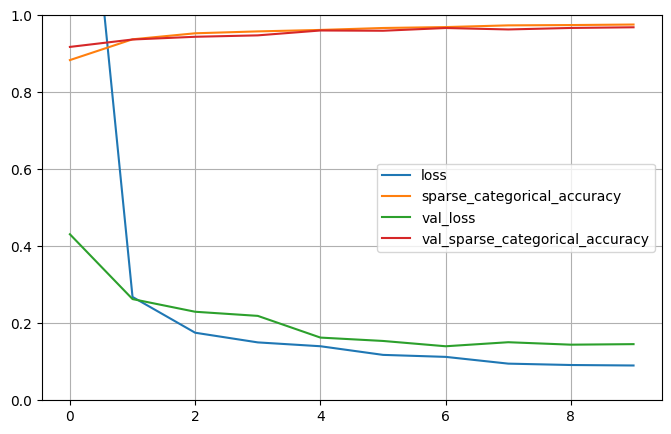

In [44]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid()
plt.gca().set_ylim(0, 1)
plt.show()